In [94]:
import os
os.chdir(r'C:\Users\Dinesh\Documents\Assignment')

import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import f_regression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes = True)

In [95]:
df = pd.read_excel('credit_dataset_final.xlsx')

In [96]:
print df.shape
df.dtypes

(1000, 21)


credit.rating                     int64
account.balance                   int64
credit.duration.months            int64
previous.credit.payment.status    int64
credit.purpose                    int64
credit.amount                     int64
savings                           int64
employment.duration               int64
installment.rate                  int64
marital.status                    int64
guarantor                         int64
residence.duration                int64
current.assets                    int64
age                               int64
other.credits                     int64
apartment.type                    int64
bank.credits                      int64
occupation                        int64
dependents                        int64
telephone                         int64
foreign.worker                    int64
dtype: object

In [97]:
df.head(10)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2
5,1,1,10,3,4,2241,1,1,1,3,1,3,1,48,2,1,2,2,2,1,2
6,1,1,8,3,4,3398,1,3,1,3,1,4,1,39,2,2,2,2,1,1,2
7,1,1,6,3,4,1361,1,1,2,3,1,4,1,40,2,2,1,2,2,1,2
8,1,3,18,3,3,1098,1,1,4,1,1,4,3,65,2,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,1,1,4,4,23,2,1,1,1,1,1,1


In [98]:
df.tail(10)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
990,0,1,18,2,3,750,1,1,4,1,1,1,1,27,2,2,1,1,1,1,1
991,0,2,24,2,1,12579,1,4,4,1,1,2,4,44,2,3,1,4,1,2,1
992,0,1,18,2,1,7511,4,4,1,3,1,4,2,51,2,3,1,3,2,2,1
993,0,1,18,3,4,3966,1,4,1,1,1,4,1,33,1,1,2,3,1,2,1
994,0,1,12,1,3,6199,1,2,4,3,1,2,2,28,2,1,2,3,1,2,1
995,0,1,24,2,3,1987,1,2,2,3,1,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,2,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,1,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,1,1,4,52,2,2,1,4,1,2,1
999,0,1,30,2,2,6350,4,4,4,3,1,4,2,31,2,2,1,3,1,1,1


In [99]:
for each in df.columns:
    print (each, ": ", df[each].unique())

(u'credit.rating', ': ', array([1, 0], dtype=int64))
(u'account.balance', ': ', array([1, 2, 3], dtype=int64))
(u'credit.duration.months', ': ', array([18,  9, 12, 10,  8,  6, 24, 11, 30, 48, 36, 15, 42, 21, 27, 33, 28,
        4, 47, 14, 39, 60,  5, 22, 54, 13, 16,  7, 20, 26, 45, 72, 40], dtype=int64))
(u'previous.credit.payment.status', ': ', array([3, 2, 1], dtype=int64))
(u'credit.purpose', ': ', array([2, 4, 3, 1], dtype=int64))
(u'credit.amount', ': ', array([ 1049,  2799,   841,  2122,  2171,  2241,  3398,  1361,  1098,
        3758,  3905,  6187,  1957,  7582,  1936,  2647,  3939,  3213,
        2337,  7228,  3676,  3124,  2384,  1424,  4716,  4771,   652,
        1154,  3556,  4796,  3017,  3535,  6614,  1376,  1721,   860,
        1495,  1934,  3378,  3868,   996,  1755,  1028,  2825,  1239,
        1216,  1258,  1864,  1474,  1382,   640,  3919,  1224,  2331,
        6313,   385,  1655,  1053,  3160,  3079,  1163,  2679,  3578,
       10875,  1344,  1237,  3077,  2284,  156

In [100]:
#check for missing values
df.isnull().sum()

credit.rating                     0
account.balance                   0
credit.duration.months            0
previous.credit.payment.status    0
credit.purpose                    0
credit.amount                     0
savings                           0
employment.duration               0
installment.rate                  0
marital.status                    0
guarantor                         0
residence.duration                0
current.assets                    0
age                               0
other.credits                     0
apartment.type                    0
bank.credits                      0
occupation                        0
dependents                        0
telephone                         0
foreign.worker                    0
dtype: int64

In [101]:
#Cleaning, corrections and handling missing data based on the data dictionary provided
df['marital.status'] = df['marital.status'].replace(4,2)

In [102]:
df.dtypes

credit.rating                     int64
account.balance                   int64
credit.duration.months            int64
previous.credit.payment.status    int64
credit.purpose                    int64
credit.amount                     int64
savings                           int64
employment.duration               int64
installment.rate                  int64
marital.status                    int64
guarantor                         int64
residence.duration                int64
current.assets                    int64
age                               int64
other.credits                     int64
apartment.type                    int64
bank.credits                      int64
occupation                        int64
dependents                        int64
telephone                         int64
foreign.worker                    int64
dtype: object

In [103]:
#summarize numerical variables
df.describe()

#all columns have all 1000 counts. which means there are no missing values
#for the continuos variables, age, credit amount and credit duration in months, std is high, which means that values are not centered around the mean
#checking if min and max values make sense

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.292000,2.965000,3271.24800,1.874000,2.44600,2.973000,2.188000,1.093000,2.845000,2.358000,35.54200,1.814000,1.928000,1.367000,2.904000,1.155000,1.404000,1.037000
std,0.458487,0.835589,12.058814,0.620581,0.971967,2822.75176,1.196476,1.10558,1.118715,0.934628,0.290578,1.103718,1.050209,11.35267,0.389301,0.530186,0.482228,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,1.000000,1.000000,250.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.000000,2.000000,1365.50000,1.000000,2.00000,2.000000,1.000000,1.000000,2.000000,1.000000,27.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.000000,3.000000,2319.50000,1.000000,2.00000,3.000000,3.000000,1.000000,3.000000,2.000000,33.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,3.000000,4.000000,3972.25000,3.000000,4.00000,4.000000,3.000000,1.000000,4.000000,3.000000,42.00000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,3.000000,4.000000,18424.00000,4.000000,4.00000,4.000000,3.000000,2.000000,4.000000,4.000000,75.00000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000


0.7


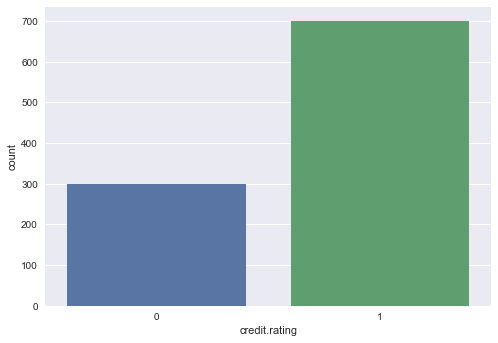

In [104]:
print (df['credit.rating'].mean())
sns.countplot(x = df['credit.rating'])
plt.show()

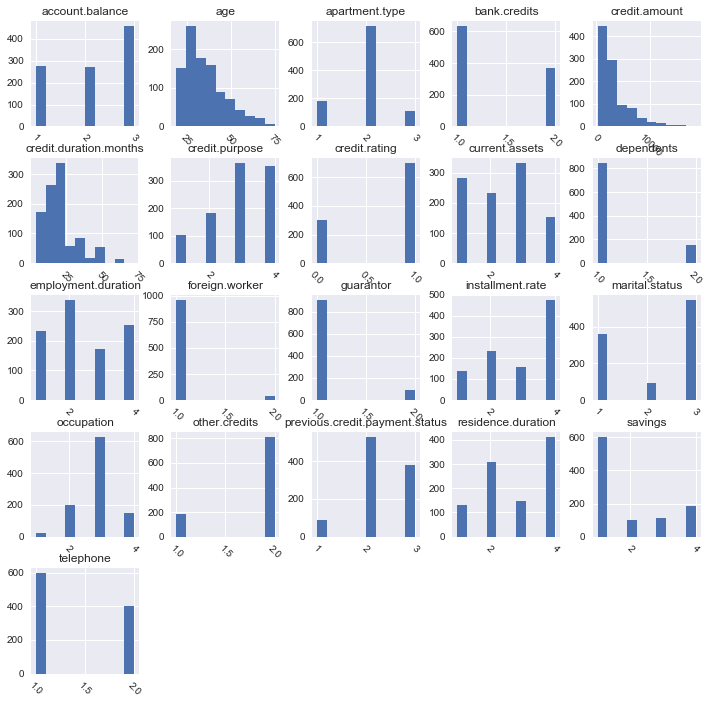

In [105]:
#univariate analysis for continuos and ordinal
#checking distributions of numerical/ordinal variables
df.hist(figsize=(12,12), xrot=-45)
plt.show()

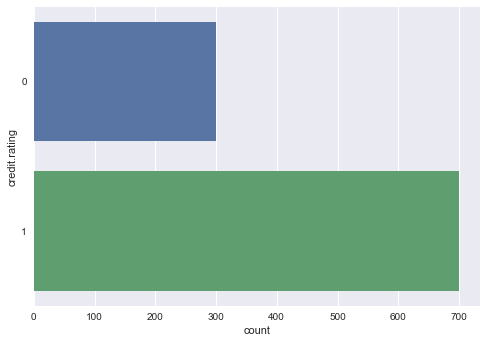

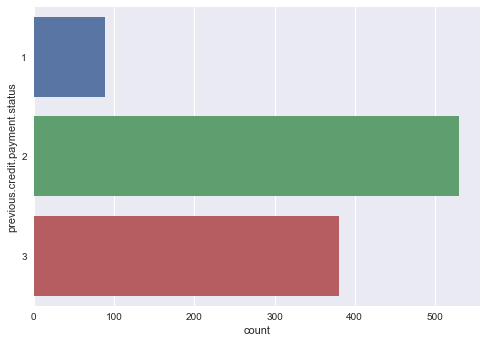

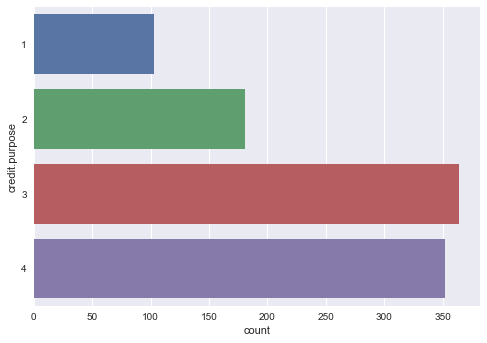

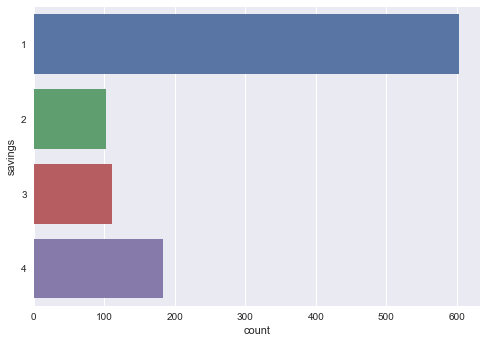

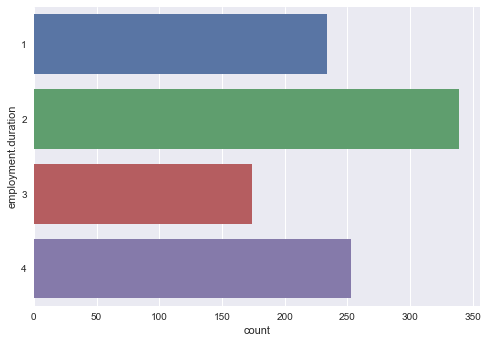

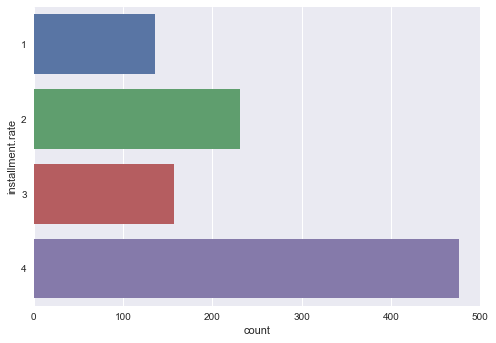

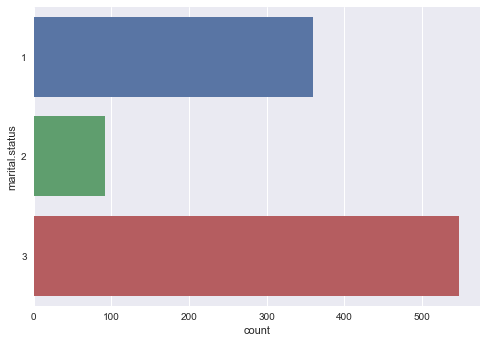

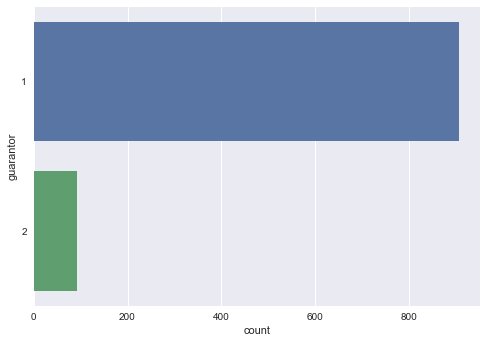

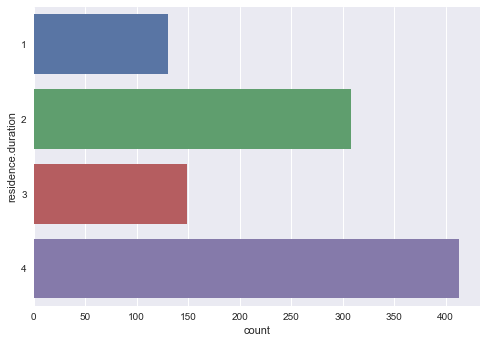

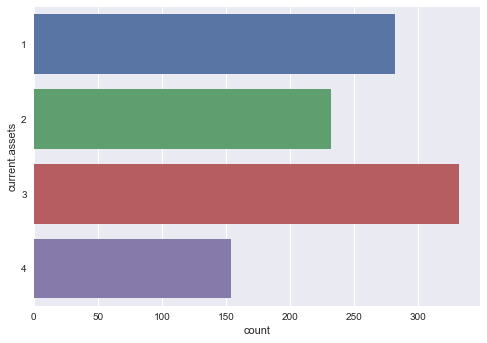

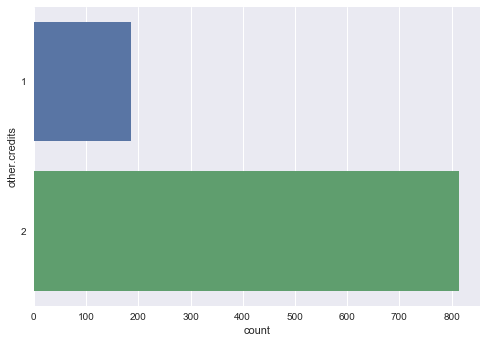

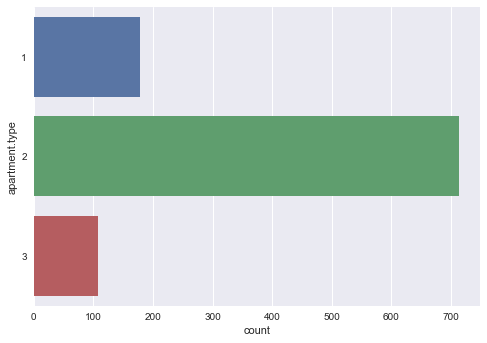

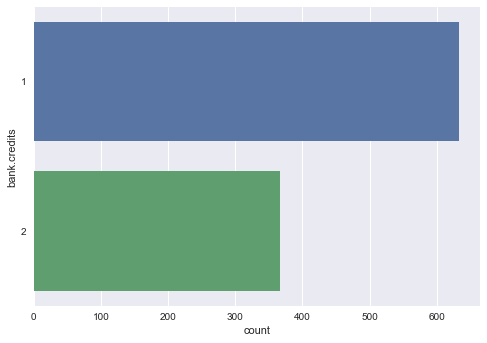

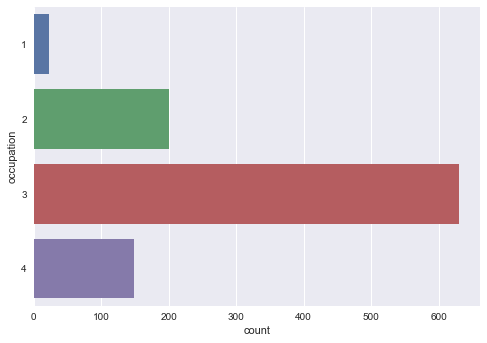

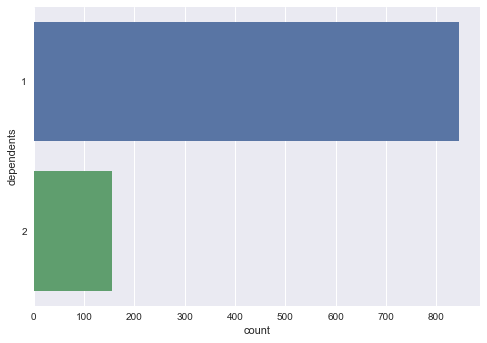

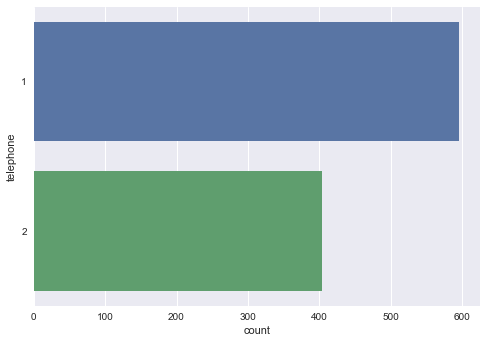

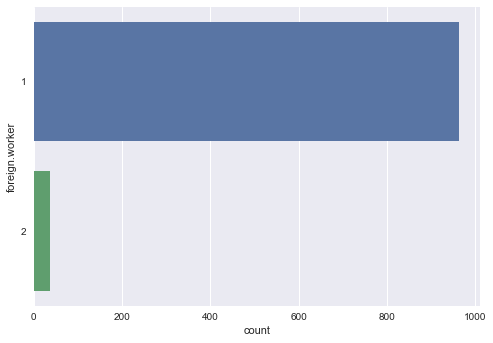

In [106]:
cat_list = ['credit.rating',
'previous.credit.payment.status',
'credit.purpose',
'savings',
'employment.duration',
'installment.rate',
'marital.status',
'guarantor',
'residence.duration',
'current.assets',
'other.credits',
'apartment.type',
'bank.credits',
'occupation',
'dependents',
'telephone',
'foreign.worker']

for each in cat_list:
    sns.countplot(y = each, data = df)
    plt.show()


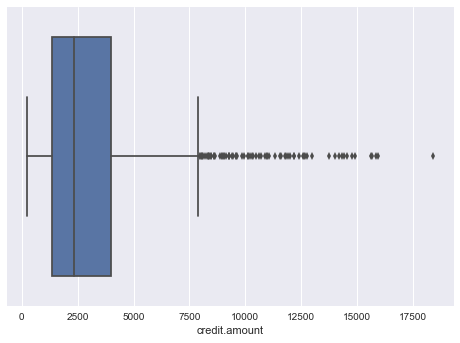

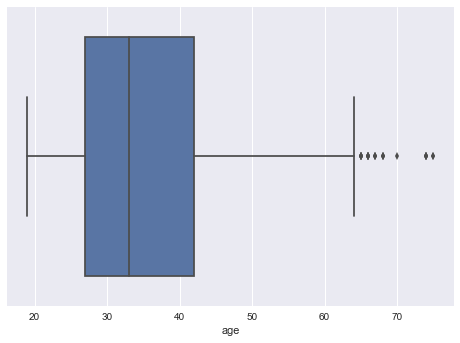

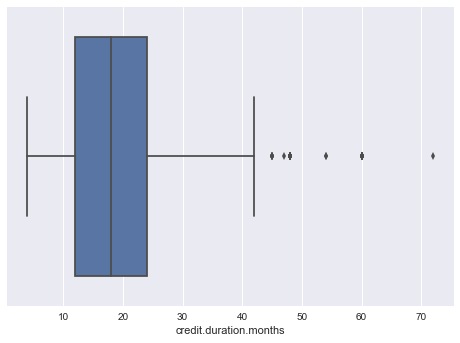

In [107]:
#Checking for outliers in continuous variables


sns.boxplot(x = 'credit.amount', data = df)
plt.show()

sns.boxplot(x = 'age', data = df)
plt.show()

sns.boxplot(x = 'credit.duration.months', data = df)
plt.show()


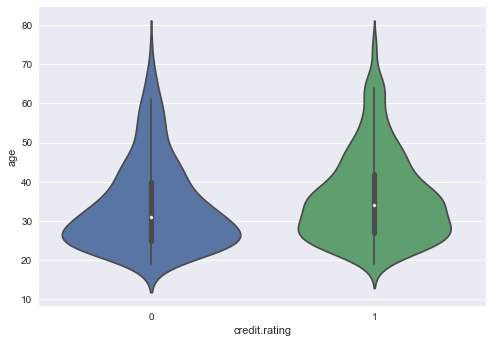

In [108]:
#segmentations
sns.violinplot(x="credit.rating", y = "age", data = df)
plt.show()

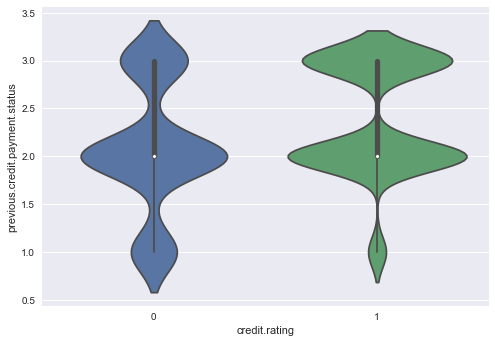

In [109]:
sns.violinplot(x="credit.rating", y = "previous.credit.payment.status", data = df)

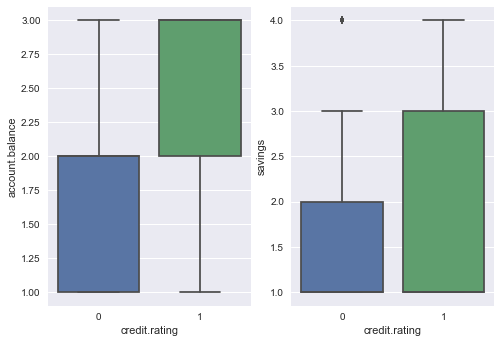

In [110]:
fig, ax = plt.subplots(1,2)
sns.boxplot(x="credit.rating", y = "account.balance", data = df, ax = ax[0])
sns.boxplot(x = "credit.rating", y = "savings", data = df,  ax = ax[1])

In [111]:
df.groupby('credit.rating').mean()

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
credit.rating,,,,,,,,,,,,,,,,,,,,
0,1.750000,24.860000,2.083333,3.123333,3938.126667,1.546667,2.246667,3.096667,2.056667,1.093333,2.850000,2.586667,33.96,1.746667,1.913333,1.333333,2.936667,1.153333,1.376667,1.013333
1,2.368571,19.207143,2.381429,2.897143,2985.442857,2.014286,2.531429,2.920000,2.244286,1.092857,2.842857,2.260000,36.22,1.842857,1.934286,1.381429,2.890000,1.155714,1.415714,1.047143


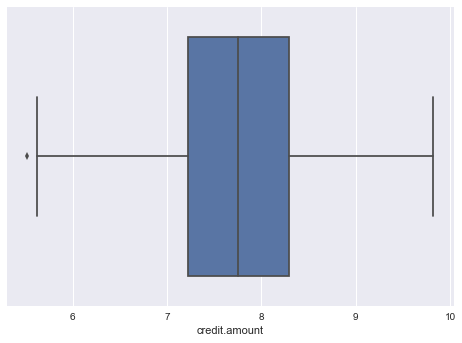

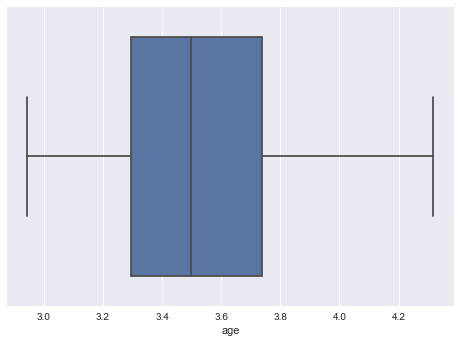

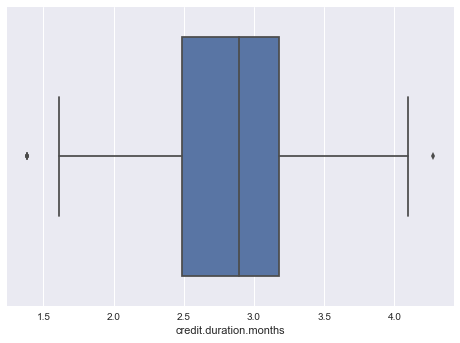

"df['credit.amount'] = df['credit.amount'].apply(np.log)\ndf['age'] = df['age'].apply(np.log)\ndf['credit.duration.months'] = df['credit.duration.months'].apply(np.log)"

In [112]:
#Log transformation for removing outliers

sns.boxplot(x = df['credit.amount'].apply(np.log))
plt.show()

sns.boxplot(x = df['age'].apply(np.log))
plt.show()

sns.boxplot(x = df['credit.duration.months'].apply(np.log))
plt.show()

'''df['credit.amount'] = df['credit.amount'].apply(np.log)
df['age'] = df['age'].apply(np.log)
df['credit.duration.months'] = df['credit.duration.months'].apply(np.log)'''

# Feature engineering

In [113]:
#creating new features
model_df = df
#Indicator Variable Age_Cat
interval = (18, 25, 35, 60, 120)
categories = ['Student', 'Young', 'Adult', 'Senior']
model_df["Age_cat"] = pd.cut(model_df.age, interval, labels=categories)
model_df["Age_cat"] = model_df["Age_cat"].replace('Student', 1)
model_df["Age_cat"] = model_df["Age_cat"].replace('Young', 2)
model_df["Age_cat"] = model_df["Age_cat"].replace('Adult', 3)
model_df["Age_cat"] = model_df["Age_cat"].replace('Senior', 4)

#Indicator Variable Rich_Guy where account balance is 4 and savings = 4
model_df['rich_guy'] = ((model_df['account.balance'] == 3) & (model_df['savings'] == 4)).astype(int)
model_df['divorced'] = ((model_df['marital.status'] == 1).astype(int))

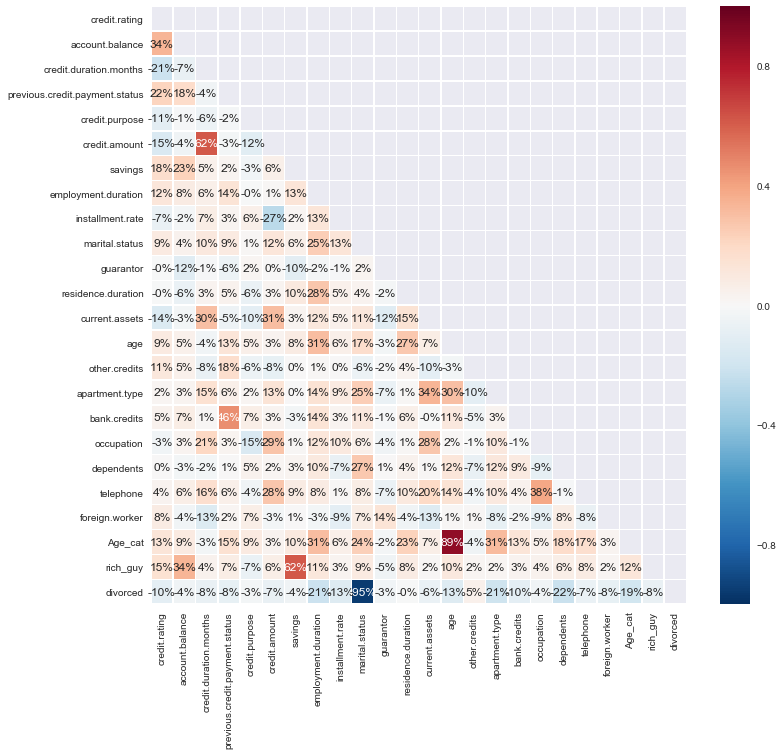

In [114]:
correlations = model_df.corr()

#mask the top triangle 
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#plot the figure
plt.figure(figsize=(12,11))
#sns.heatmap(correlations, linewidths=0.5, cmap="YlGnBu", mask = mask, annot=True, fmt = ".0%")
sns.heatmap(correlations, linewidths=0.5, mask = mask, annot=True, fmt = ".0%")
plt.show()

In [122]:
#dropping columns based on p-values
model_df = model_df.drop(['guarantor', 'residence.duration', 'apartment.type', 'bank.credits', 'occupation', 'dependents', 'telephone'], axis=1)
model_df = model_df.drop(['age','marital.status', 'other.credits'], axis = 1)
model_df = model_df.drop(['other.credits'], axis = 1)

In [123]:
y = model_df['credit.rating']
X = model_df.drop('credit.rating', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [124]:
#Feature selection
F, pval = f_regression(X_train,y_train)
np.round(pval,3)

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.001,  0.009,
        0.001,  0.01 ,  0.002,  0.   ,  0.024])

In [126]:
X_train.head()

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,current.assets,foreign.worker,Age_cat,rich_guy,divorced
703,1,30,2,2,3622,3,4,4,2,1,3,0,1
311,3,48,3,1,2751,4,4,4,3,1,3,1,0
722,3,21,3,1,2993,1,2,3,1,1,2,0,0
629,1,12,2,2,2578,1,1,3,4,1,3,0,1
0,1,18,3,2,1049,1,1,4,2,1,1,0,1


In [128]:
#Define pipelines with Preprocessing and selected models
#If your training set is small, high bias/ low variance have an advantage over low bias/ high variance 
#If the training set grows, low bias/high variance takes over 

#add svc, decision trees and Knn
pipelines = { 
    'l1' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l1' , random_state = 123)),
    'l2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2' , random_state = 123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state = 123)),
    'dt' : make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=123)),
    'svc': make_pipeline(StandardScaler(), SVC(random_state=123, probability=True)),
    'knn': make_pipeline(StandardScaler(), KNeighborsClassifier())
}

In [129]:
pipelines['svc'].get_params()

{'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=True, random_state=123, shrinking=True,
     tol=0.001, verbose=False))],
 'svc': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=True, random_state=123, shrinking=True,
   tol=0.001, verbose=False),
 'svc__C': 1.0,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': None,
 'svc__degree': 3,
 'svc__gamma': 'auto',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': True,
 'svc__ra

In [130]:
#Display pipeline parameters
#pipelines['l1'].get_params()

# Logistic Regression hyperparameters
#Here C is the inverse of regularization strength. Smaller c value is stronger regularization
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10), #10 numbers between 1e-3 TO 1e3
}

l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10), #0.001 TO 1000
}

rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 150, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 150, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

dt_hyperparameters = {
    'decisiontreeclassifier__criterion': ["gini", "entropy"],
    'decisiontreeclassifier__min_samples_split': [2, 10, 20],
    'decisiontreeclassifier__max_depth': [None, 2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 5, 10],
    'decisiontreeclassifier__max_leaf_nodes': [None, 5, 10, 20]
}

svc_hyperparameters = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']     
}

knn_hyperparameters = {
    'kneighborsclassifier__n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'kneighborsclassifier__algorithm': ['auto']   
}


In [131]:
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'dt' : dt_hyperparameters,
    'svc': svc_hyperparameters,
    'knn': knn_hyperparameters
}

In [132]:
#Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    # number of jobs to run in parallel
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    print "Fitting ", name
    print "------------------"
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    #Printing best parameters
    print ("Best parameters set of development set:")
    print (model.best_params_)
    print "__________________________________________"
        
    '''print ("Grid scores on development set:")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
        
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        #mean score and 95% confidence interval
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print "__________________________________________"'''
    
    print ("\nBest Estimators:")
    print (model.best_estimator_, "\n")
    print "__________________________________________"
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print "----------------------------"
    print(name, 'has been fitted.\n')
    print "----------------------------"

Fitting  knn
------------------
Best parameters set of development set:
{'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 6}
__________________________________________

Best Estimators:
(Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform'))]), '\n')
__________________________________________
----------------------------
('knn', 'has been fitted.\n')
----------------------------
Fitting  svc
------------------
Best parameters set of development set:
{'svc__gamma': 0.001, 'svc__kernel': 'linear', 'svc__C': 1}
__________________________________________

Best Estimators:
(Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decis

In [133]:
print "Holdout accuracy scores (Percentage of observations correctly classified) \n"

for name, model in fitted_models.items():
    print name, ": ", model.best_score_ 

Holdout accuracy scores (Percentage of observations correctly classified) 

knn :  0.753731343284
svc :  0.779104477612
rf :  0.782089552239
l2 :  0.776119402985
gb :  0.782089552239
l1 :  0.776119402985
dt :  0.75671641791


<h3>Best Model L2<h3>

In [134]:
# Predict classes using L1-regularized logistic regression 
pred = fitted_models['l2'].predict(X_test)

# Display first 10 predictions
pred[:10]

confusionMatrix = pd.DataFrame(confusion_matrix(y_test, pred).tolist(), columns = ['Predicted: No', 'Predicted: Yes'])
confusionMatrix

#82 incorrectly classified

,Predicted: No,Predicted: Yes
0,53,45
1,36,196


In [135]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models['l1'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

# Display first 10 predictions
pred[:10]

[0.33459455708435537,
 0.9615445565642825,
 0.89664675085040002,
 0.97905682705524688,
 0.90352556428983277,
 0.92338926220516149,
 0.82518186510600344,
 0.65389563762536496,
 0.47459584688936535,
 0.83940268912991356]

In [136]:
#True positive rate (TPR), also known as recall, is defined as TP/TP+FN. In other words, it's the proportion of all positive observations that are correctly predicted to be positive.
#False positive rate (FPR) is defined as FP/FP+TN. In other words, it's the proportion of all negative observations that are incorrectly predicted to be positive.

fpr, tpr, thresholds = roc_curve(y_test, pred)

In [137]:
pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds}).tail(10)

#Decreasing theshold increases the TPR and FPR


,FPR,TPR,Thresholds
113,0.846939,0.965517,0.292212
114,0.887755,0.965517,0.247178
115,0.887755,0.974138,0.238618
116,0.897959,0.974138,0.223548
117,0.897959,0.987069,0.205555
118,0.938776,0.987069,0.154553
119,0.938776,0.991379,0.142175
120,0.948980,0.991379,0.129840
121,0.948980,1.000000,0.094546
122,1.000000,1.000000,0.057928


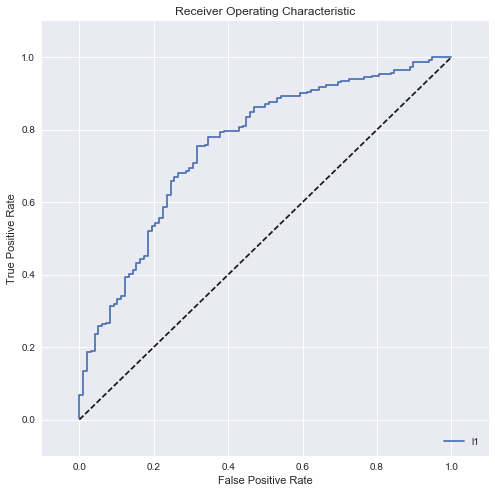

In [138]:
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [139]:
#L2 -regularized logistic regression has a 75.85% chance of distinguishing between
# Calculate AUROC
print( auc(fpr, tpr) )

0.756069669247


In [140]:
#AUC Scores for test data

for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print( name, auc(fpr, tpr) )

('knn', 0.68952322308233638)
('svc', 0.7627990851513019)
('rf', 0.73194493314567211)
('l2', 0.77062807881773399)
('gb', 0.75211118930330767)
('l1', 0.75606966924700902)
('dt', 0.75644352568613649)


In [141]:
#AUC Scores for training data

for name, model in fitted_models.items():
    pred = model.predict_proba(X_train)
    pred = [p[1] for p in pred]
    
    fpr, tpr, thresholds = roc_curve(y_train, pred)
    print( name, auc(fpr, tpr) )

('knn', 0.89262820512820518)
('svc', 0.81728653634594228)
('rf', 1.0)
('l2', 0.81223026148768729)
('gb', 0.95315012270457822)
('l1', 0.8200791232969451)
('dt', 0.79106372175679107)
